<a href="https://colab.research.google.com/github/aarthurrosado/Fazenda/blob/main/Trabalho_Cap_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [2]:

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Lendo arquivo csv

In [5]:
# ler o arquivo csv de fertilizantes
df_fertilizantes = pd.read_csv("produtos_agricolas.csv")

# Exibir Dados (Analise Exploratoria)

In [6]:
print("Primeiras linhas do Data Frame\n")
print(df_fertilizantes.head())

print("Ultimas linhas do Data Frame\n")
print(df_fertilizantes.tail())



Primeiras linhas do Data Frame

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Ultimas linhas do Data Frame

        N   P   K  temperature   humidity        ph    rainfall   label
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee


In [7]:
valores_nulos = df_fertilizantes.isnull().sum()
print(f"Valores nulos por coluna: \n {valores_nulos}")

Valores nulos por coluna: 
 N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [8]:
num_linhas, num_colunas = df_fertilizantes.shape
print(f"Dimensoes do DataFrame: {num_linhas} linhas  x {num_colunas} colunas \n")


Dimensoes do DataFrame: 2200 linhas  x 8 colunas 



In [ ]:
print(df_fertilizantes.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


In [ ]:
print(df_fertilizantes.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


# Tratamento de Dados

In [12]:
#mudando nomes das colunas para portugues
novo_nomes = {'temperature': 'Temperatura',
              'humidity': 'Umidade',
              'ph': 'pH',
              'rainfall': 'Chuva',
              'N': 'Nitrogenio',
              'P': 'fosforo',
              'K': 'Potassio',
              'label': 'Cultura'
              }
df_fertilizantes.rename(columns=novo_nomes,inplace=True)
dados_nulos = (df_fertilizantes.isnull().sum()) # devolve se existe algum valor nulo em boleano
print(dados_nulos)


Nitrogenio     0
fosforo        0
Potassio       0
Temperatura    0
Umidade        0
pH             0
Chuva          0
Cultura        0
dtype: int64


## Tratando dados duplicados

In [11]:
duplicatas = df_fertilizantes[df_fertilizantes.duplicated(keep=False)]
df_fertilizantes = df_fertilizantes.drop_duplicates() # remove todas as duplicatas possiveis existentes no dataset
print(df_fertilizantes)


      Nitrogenio  fosforo  Potassio  Temperatura    Umidade        pH  \
0             90       42        43    20.879744  82.002744  6.502985   
1             85       58        41    21.770462  80.319644  7.038096   
2             60       55        44    23.004459  82.320763  7.840207   
3             74       35        40    26.491096  80.158363  6.980401   
4             78       42        42    20.130175  81.604873  7.628473   
...          ...      ...       ...          ...        ...       ...   
2195         107       34        32    26.774637  66.413269  6.780064   
2196          99       15        27    27.417112  56.636362  6.086922   
2197         118       33        30    24.131797  67.225123  6.362608   
2198         117       32        34    26.272418  52.127394  6.758793   
2199         104       18        30    23.603016  60.396475  6.779833   

           Chuva Cultura  
0     202.935536    rice  
1     226.655537    rice  
2     263.964248    rice  
3     242.86403

# Analise Descritiva

##Mudando a escala dos Dados

In [13]:
scaler = (MinMaxScaler())
df_fertilizantes[['Nitrogenio', 'fosforo', 'Potassio']] = scaler.fit_transform( # transforma p/ uma escala de 0 a 1 p/ facilitar algoritmos de ML
    df_fertilizantes[['Nitrogenio', 'fosforo', 'Potassio']]
)
df_fertilizantes.columns = df_fertilizantes.columns.str.strip()

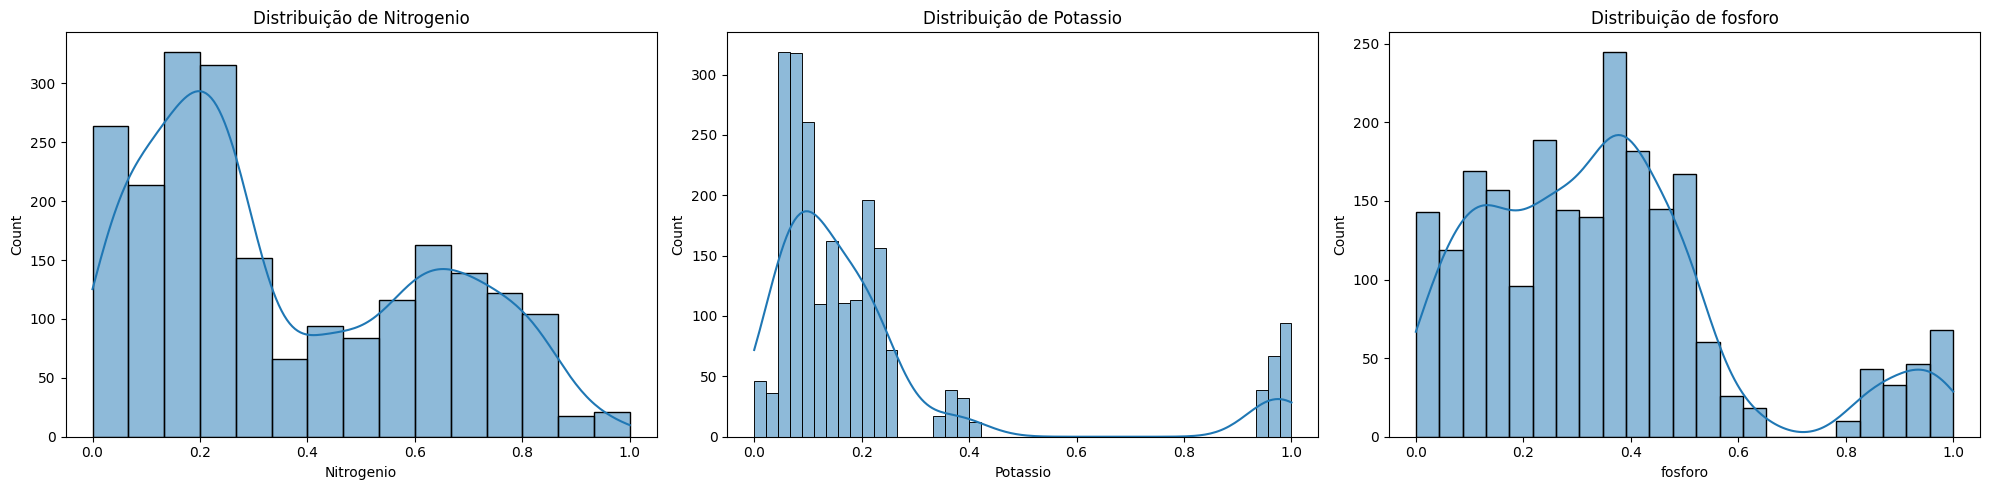

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [15]:
plt.figure(figsize=(20, 5))
for i, col in enumerate(['Nitrogenio', 'Potassio', 'fosforo']):
    plt.subplot(1, 3, i+1)
    sns.histplot(df_fertilizantes[col], kde=True)
    plt.title(f'Distribuição de {col}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))

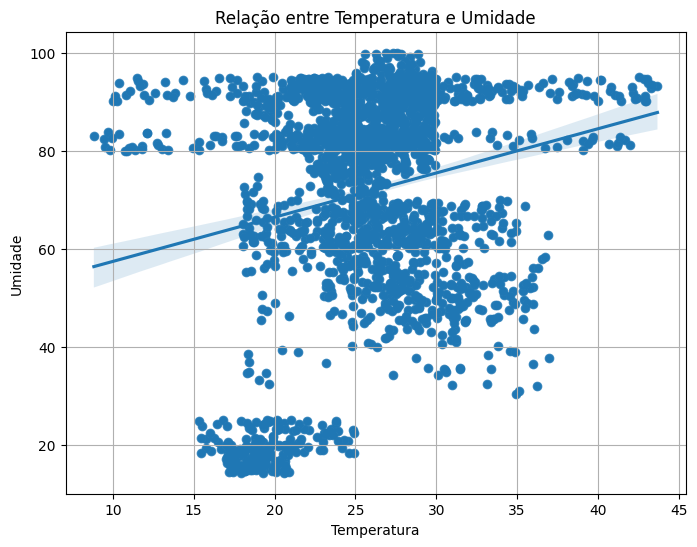

In [ ]:
# Relacao entre temperatura e umidade
df_fertilizantes.columns = df_fertilizantes.columns.str.strip()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Temperatura', y='Umidade', data=df_fertilizantes)
plt.title('Relação entre Temperatura e Umidade')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Umidade (%)')
plt.grid(True)
sns.regplot(x='Temperatura', y='Umidade', data=df_fertilizantes)
plt.show()

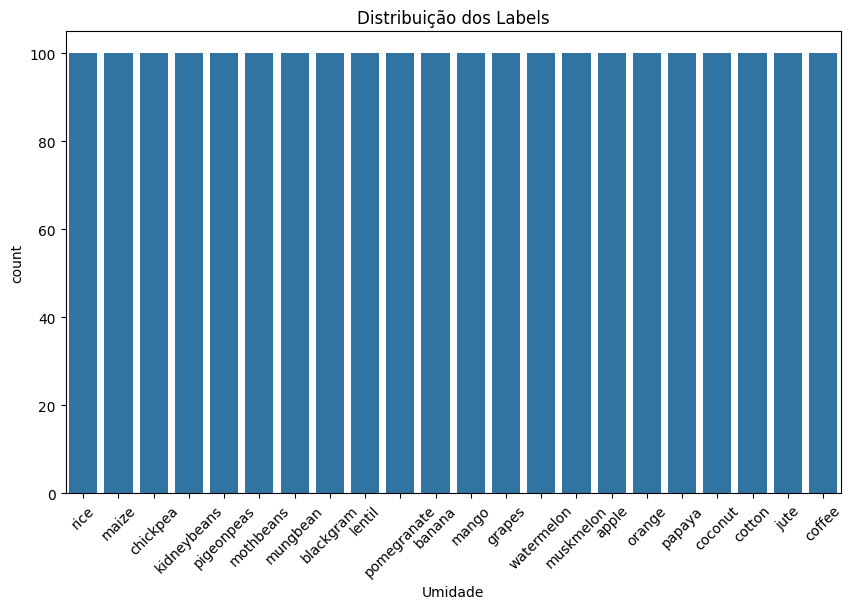

In [ ]:
# Exploração da distribuição dos labels
plt.figure(figsize=(10, 6))
sns.countplot(x='cultura', data=df_fertilizantes)
plt.title("Distribuição dos Labels")
plt.xlabel("Umidade")
plt.xticks(rotation=45)
plt.show()

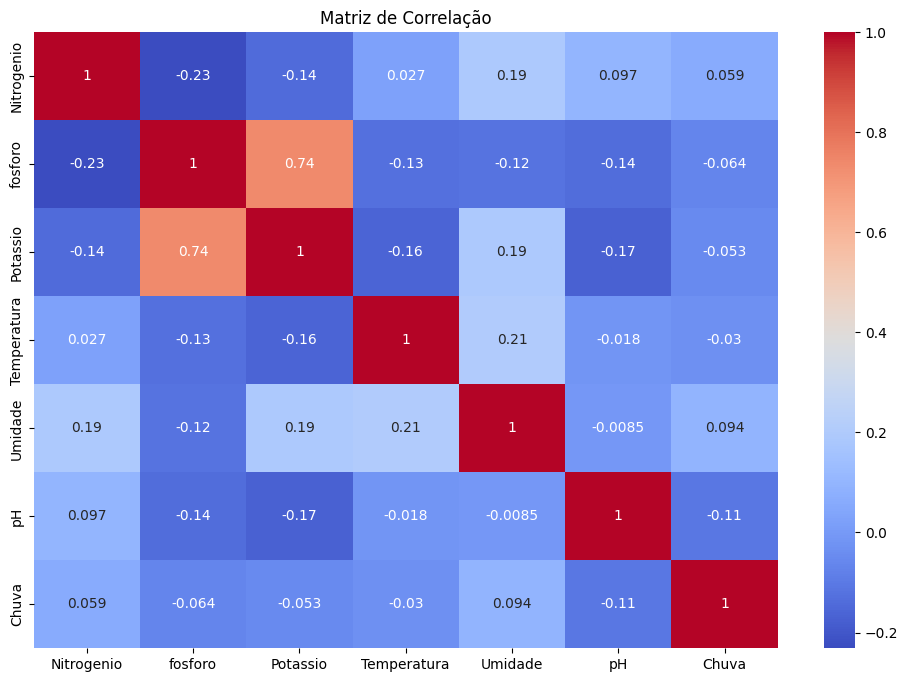

In [16]:
# Correlação entre as features numéricas
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
plt.figure(figsize=(12, 8))
sns.heatmap(df_fertilizantes.select_dtypes(include=numerics).corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [17]:
# Separando features (X) e rótulo (y)
X = df_fertilizantes.drop('Cultura', axis=1)
y = df_fertilizantes['Cultura']

# Codificando os rótulos da variável alvo
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Divisão treino e teste (80% treino, 20% teste)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização (MinMaxScaler para manter entre 0 e 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Agrupar por cultura e calcular a média das variáveis numéricas
perfil_ideal = df_fertilizantes.groupby('Cultura').mean(numeric_only=True).round(2)
print(perfil_ideal)

             Nitrogenio  fosforo  Potassio  Temperatura  Umidade    pH   Chuva
Cultura                                                                       
apple              0.15     0.92      0.97        22.63    92.33  5.93  112.65
banana             0.72     0.55      0.23        27.38    80.36  5.98  104.63
blackgram          0.29     0.45      0.07        29.97    65.12  7.13   67.88
chickpea           0.29     0.45      0.37        18.87    16.86  7.34   80.06
coconut            0.16     0.09      0.13        27.41    94.84  5.98  175.69
coffee             0.72     0.17      0.12        25.54    58.87  6.79  158.07
cotton             0.84     0.29      0.07        23.99    79.84  6.91   80.40
grapes             0.17     0.91      0.98        23.85    81.88  6.03   69.61
jute               0.56     0.30      0.17        24.96    79.64  6.73  174.79
kidneybeans        0.15     0.45      0.08        20.12    21.61  5.75  105.92
lentil             0.13     0.45      0.07        24

# Classificar culturas

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
kernels = {
    "SVM RBF": "rbf",
    "SVM Polinomial": "poly",
    "SVM Linear": "linear"
}

print(f"{'Modelo':<15} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10} {'F1-score':<10}")
print("-" * 60)

for nome, kernel in kernels.items():
    clf = SVC(kernel=kernel)
    clf.fit(X_train_scaled, y_train)
    y_pred = clf.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{nome:<15} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")


Modelo          Acurácia   Precisão   Recall     F1-score  
------------------------------------------------------------
SVM RBF         0.9682     0.9680     0.9700     0.9663    
SVM Polinomial  0.9636     0.9629     0.9657     0.9628    
SVM Linear      0.9568     0.9584     0.9587     0.9546    


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

modelos_arvore = {
    "Árvore Decisão": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=25, random_state=42)
}

print(f"{'Modelo':<15} {'Acurácia':<10} {'Precisão':<10} {'Recall':<10} {'F1-score':<10}")
print("-" * 60)

for nome, modelo in modelos_arvore.items():
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    print(f"{nome:<15} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

Modelo          Acurácia   Precisão   Recall     F1-score  
------------------------------------------------------------
Árvore Decisão  0.9818     0.9808     0.9833     0.9818    
Random Forest   0.9909     0.9894     0.9914     0.9898    
